# Part 1: PCA and Variance Threshold in a Linear Regression

In [66]:
# Load the dataset as a Pandas data frame.

import pandas as pd

houseprices = pd.read_csv(r"C:\Users\Riaz\Desktop\MSDS\Data Mining\Week 6\house-prices-advanced-regression-techniques\train.csv")

# Required libraries are imported and using the read_csv function the dataframe has been loaded from csv file.

print ('The shape of the original dataset is',houseprices.shape)

houseprices

The shape of the original dataset is (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [67]:
# Dropping the id column using drop function,

houseprices_iddrop=houseprices.drop(columns='Id')

# Finding the NaN values in the columns, which are having count more than 584.  
# 584 is the 40% of the total rows 1460,

series=houseprices_iddrop.isna().sum()

print("Following are the columns which are having more than 584 NaN values and needs to be dropped,",'\n')
print(series[series.values > 584])


Following are the columns which are having more than 584 NaN values and needs to be dropped, 

Alley          1369
MasVnrType      872
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64


In [68]:
# Dropping the features that are missing more than 40% of their values.

houseprices_dropped=houseprices.drop(columns=['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'])
houseprices_dropped

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [69]:
# Following are the columns which still have NaN values and needs to be fixed,

houseprices_dropped_series=houseprices_dropped.isna().sum()
print ('Columns which are still having NaN values','\n')
print(houseprices_dropped_series[houseprices_dropped_series.values > 0])

Columns which are still having NaN values 

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


In [70]:
# For numerical columns, fill in any missing data with the median value.

print ('Following are the type of columns','\n')

print (houseprices_dropped.info(),'\n')

numerical_columns=['LotFrontage','MasVnrArea','GarageYrBlt']

medians=houseprices_dropped[numerical_columns].median()

houseprices_dropped[numerical_columns] = houseprices_dropped[numerical_columns].fillna(medians)


Following are the type of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1

In [71]:
# For categorical columns, fill in any missing data with the most common value (mode).

houseprices_dropped.isna().sum()
categorical_columns=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond']

for col in categorical_columns:
    mode = houseprices_dropped[col].mode()[0]  # Compute mode
    houseprices_dropped[col].fillna(mode, inplace=True)  # Fill missing values with mode

print(houseprices_dropped)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0            Lvl    AllPub    Inside  ... 

In [72]:
# Reconfirming if  the below categorical columns are not showing as NaN.

houseprices_dropped[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond']].isna().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [73]:
# Convert the categorical columns to dummy variables.

# Finding the columns which are of object or category type using select_dtypes,

categorical = houseprices_dropped.select_dtypes(include=['object', 'category']).columns

print ("Following are the categorical columns\n\n",categorical)

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False,drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the categorical columns
encoded_array = encoder.fit_transform(houseprices_dropped[categorical])

# Convert the encoded array to a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical))

# Concatenate the encoded DataFrame with the original DataFrame (excluding original categorical columns)
houseprices_dropped = pd.concat([houseprices_dropped.drop(categorical, axis=1), encoded_df], axis=1)

houseprices_dropped

Following are the categorical columns

 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


C:\Users\Riaz\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [74]:
# Randomly split the data into 80% training data and 20% test data

from sklearn.model_selection import train_test_split

# Using the train_test_split function we are passing the dataframe and the target which is the mpg and mentioning the 
# test size as 0.2 meaning 20%.

houseprices_dropped_train, houseprices_dropped_test, saleprice_train, saleprice_test = train_test_split(houseprices_dropped.drop(columns=['SalePrice']), houseprices_dropped['SalePrice'], test_size=0.2, random_state=42)


In [75]:
# Using linearregression model,

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Creating the model
model = LinearRegression()

# Training the model on the train dataset
model.fit(houseprices_dropped_train, saleprice_train)

# Predictions using the model on test set
# Passing the test dataset for prediction
saleprice_pred = model.predict(houseprices_dropped_test)

#print ("The predicted values using model from the test data are\n",saleprice_pred)

In [76]:
# Values for test set

print ("Following are the values for linear regression on the dataset before applying PCA and VarianceThereshold\n")

rmse = np.sqrt(mean_squared_error(saleprice_test, saleprice_pred))
print(f"Root Mean Squared Error of test set {rmse}")

mae=mean_absolute_error(saleprice_test, saleprice_pred)
print(f"Mean Absolute Error of test set {mae}")

# Calculate R² score
r2 = r2_score(saleprice_test, saleprice_pred)

print(f"R² Score of test set {r2}")

Following are the values for linear regression on the dataset before applying PCA and VarianceThereshold

Root Mean Squared Error of test set 51992.046446799555
Mean Absolute Error of test set 20384.19168971142
R² Score of test set 0.6475804521594819


In [77]:

# Fitting and transforming the training features with a PCA so that 90% of the variance is retained

# Load libraries for PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

# Initialize the StandardScaler
scaler = StandardScaler()

features = scaler.fit_transform(houseprices_dropped_train)


# Create a PCA that will retain 90% of variance
pca = PCA(n_components=0.90, whiten=True)

# Conduct PCA
features_pca_train = pca.fit_transform(features)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca_train.shape[1])

# Transform but DO NOT fit the test features with the same PCA.

features_test = scaler.transform(houseprices_dropped_test)

features_pca_test = pca.transform(features_test)

# Repeat step 7 with PCA transformed data.

# Creating the second model with PCA on test data
model2 = LinearRegression()

# Training the model on the train dataset
model2.fit(features_pca_train, saleprice_train)


# Passing the test dataset for prediction
saleprice_pred2 = model2.predict(features_pca_test)



Original number of features: 230
Reduced number of features: 127


In [78]:
# Values for test set after applying PCA,

print ('Values for test set after applying PCA\n\n')

rmse = np.sqrt(mean_squared_error(saleprice_test, saleprice_pred2))
print(f"Root Mean Squared Error of test set {rmse}")

mae=mean_absolute_error(saleprice_test, saleprice_pred2)
print(f"Mean Absolute Error of test set {mae}")

# Calculate R² score
r2 = r2_score(saleprice_test, saleprice_pred2)

print(f"R² Score of test set {r2}")

Values for test set after applying PCA


Root Mean Squared Error of test set 35005.94696269958
Mean Absolute Error of test set 22408.919300506554
R² Score of test set 0.8402393471079346


In [79]:
# Take your original training features (from step 6) and apply a min-max scaler to them.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(houseprices_dropped_train)

# Convert the scaled data back to a DataFrame
houseprices_dropped_train_minmax = pd.DataFrame(scaled_data, columns=houseprices_dropped_train.columns)

# Doing the same minmaxscaler for test dataframe,

scaled_data_test = scaler.transform(houseprices_dropped_test)

houseprices_dropped_test_minmax = pd.DataFrame(scaled_data_test, columns=houseprices_dropped_test.columns)


In [80]:
#Find the min-max scaled features in your training set that have a variance above 0.1 

from sklearn.feature_selection import VarianceThreshold

# Create thresholder
thresholder = VarianceThreshold(threshold=.1)

# Create high variance feature matrix
features_high_variance_train = thresholder.fit_transform(houseprices_dropped_train_minmax)

# View high variance feature matrix
print ("After applying the variance thereshold of 0.1 the shape of high variance feature matrix is\n ",features_high_variance_train.shape)

# Create high variance feature matrix for test data

features_high_variance_test = thresholder.transform(houseprices_dropped_test_minmax)

# Creating the third model with PCA on test data
model3 = LinearRegression()

# Training the model on the train dataset
model3.fit(features_high_variance_train, saleprice_train)

# Predictions using the model on test set
# Passing the test dataset for prediction
saleprice_pred3 = model3.predict(features_high_variance_test)




After applying the variance thereshold of 0.1 the shape of high variance feature matrix is
  (1168, 40)


In [81]:
# Values for test set after applying VarianceTheresholding,

print ('Values for test set after applying VarianceTheresholding\n\n')

rmse_highvariance = np.sqrt(mean_squared_error(saleprice_test, saleprice_pred3))
print(f"Root Mean Squared Error of test set {rmse_highvariance}")

mae_highvariance=mean_absolute_error(saleprice_test, saleprice_pred3)
print(f"Mean Absolute Error of test set {mae_highvariance}")

# Calculate R² score
r2_highvariance = r2_score(saleprice_test, saleprice_pred3)

print(f"R² Score of test set {r2_highvariance}")

Values for test set after applying VarianceTheresholding


Root Mean Squared Error of test set 51952.0146512729
Mean Absolute Error of test set 35077.822078315425
R² Score of test set 0.648122941134226


# Summary

We have done the linear regression models on 3 different types of inputs,

Using Normal values  
Using Standard scaler and PCA  
Using Minmax scaler and VariableTheresholder  

We can infer that the value of Rsquared is considerably improved to 84% after applying PCA, when compared to the original dataset and the VarianceTheresholding methods.  
FeatureSelection  using VarianceTheresholding did not provided much benefit when compared to FeatureExtraction using PCA.  


Values for linear regression on the dataset before applying PCA and VarianceThereshold
========================================================

Root Mean Squared Error of test set 51992.046446799555  
Mean Absolute Error of test set 20384.19168971142  
R² Score of test set 0.6475804521594819  

Values for test set after applying PCA
===============================


Root Mean Squared Error of test set 35005.94696269958  
Mean Absolute Error of test set 22408.919300506554  
R² Score of test set 0.8402393471079346  


Values for test set after applying VarianceTheresholding
==============================================


Root Mean Squared Error of test set 51952.0146512729  
Mean Absolute Error of test set 35077.822078315425  
R² Score of test set 0.648122941134226  

# Part 2: Categorical Feature Selection  

In [82]:
# Load the dataset as a Pandas data frame.

import pandas as pd

mushrooms = pd.read_csv(r'C:\Users\Riaz\Desktop\MSDS\Data Mining\Week 6\archive (20)\mushrooms.csv')

# Required libraries are imported and using the read_csv function the dataframe has been loaded from csv file.

print ('The shape of the original dataset is',mushrooms.shape)

mushrooms

The shape of the original dataset is (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [83]:
# There are around 2480 rows of unknown values for stalk-root.  However, I am ignoring that and keeping it as it is, 
# as there is no mention to do anything about them in the assignment.  


mushrooms[mushrooms['stalk-root'] == '?']

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3984,e,x,y,b,t,n,f,c,b,e,...,s,e,w,p,w,t,e,w,c,w
4023,p,x,y,e,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
4076,e,f,y,u,f,n,f,c,n,h,...,f,w,w,p,w,o,f,h,y,d
4100,p,x,y,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
4104,p,x,y,n,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [84]:
# Converting the categorical features (all of them) to dummy variables.

# Initialize OneHotEncoder
encoder_mushrooms = OneHotEncoder(sparse=False,drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the categorical columns, by excluding the class column as that is considered as a target variable,
encoded_array = encoder_mushrooms.fit_transform(mushrooms.drop(columns='class'))

# Convert the encoded array to a DataFrame by passing on the column names,
encoded_df = pd.DataFrame(encoded_array, columns=encoder_mushrooms.get_feature_names_out(input_features=mushrooms.drop(columns='class').columns))

# Concatenating with the target variable with the dataframe,
mushrooms_encoded = pd.concat([mushrooms['class'], encoded_df], axis=1)

mushrooms_encoded



C:\Users\Riaz\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,class,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,e,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,e,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,p,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,e,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,e,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,e,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,p,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [85]:
# Randomly split the data into 80% training data and 20% test data

from sklearn.model_selection import train_test_split

# Using the train_test_split function we are passing the dataframe and the target which is the mpg and mentioning the 
# test size as 0.2 meaning 20%.

mushrooms_encoded_train, mushrooms_encoded_test, class_train, class_test = train_test_split(mushrooms_encoded.drop(columns=['class']), mushrooms_encoded['class'], test_size=0.2, random_state=42)


In [86]:
# Fitting a decision tree classifier on the training set.

# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)

# Train model
model = decisiontree.fit(mushrooms_encoded_train, class_train)
class_predict = model.predict(mushrooms_encoded_test)

The accuracy of the decision tree model on test data is
 1.0
Confusion matrix for decision tree model is
 [[843   0]
 [  0 782]]


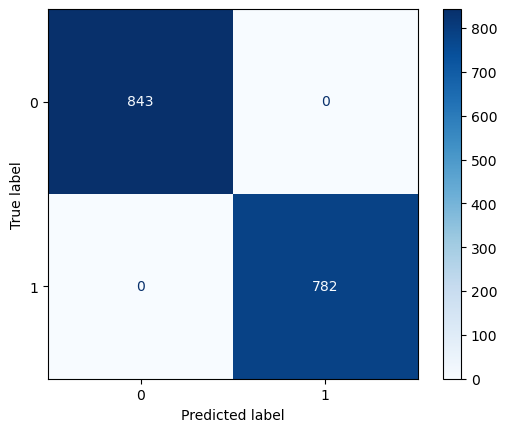

In [87]:
# Calculating the accuracy of the DecisionTreeClassifier model,

from sklearn.linear_model import LogisticRegression

# Finding the accuracy on test set using score function

print ("The accuracy of the decision tree model on test data is\n",model.score(mushrooms_encoded_test,class_test))


# Importing libraries for confusion matrix and its display,

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(class_test,class_predict)
print ("Confusion matrix for decision tree model is\n",cm)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Visualization of the decision tree is



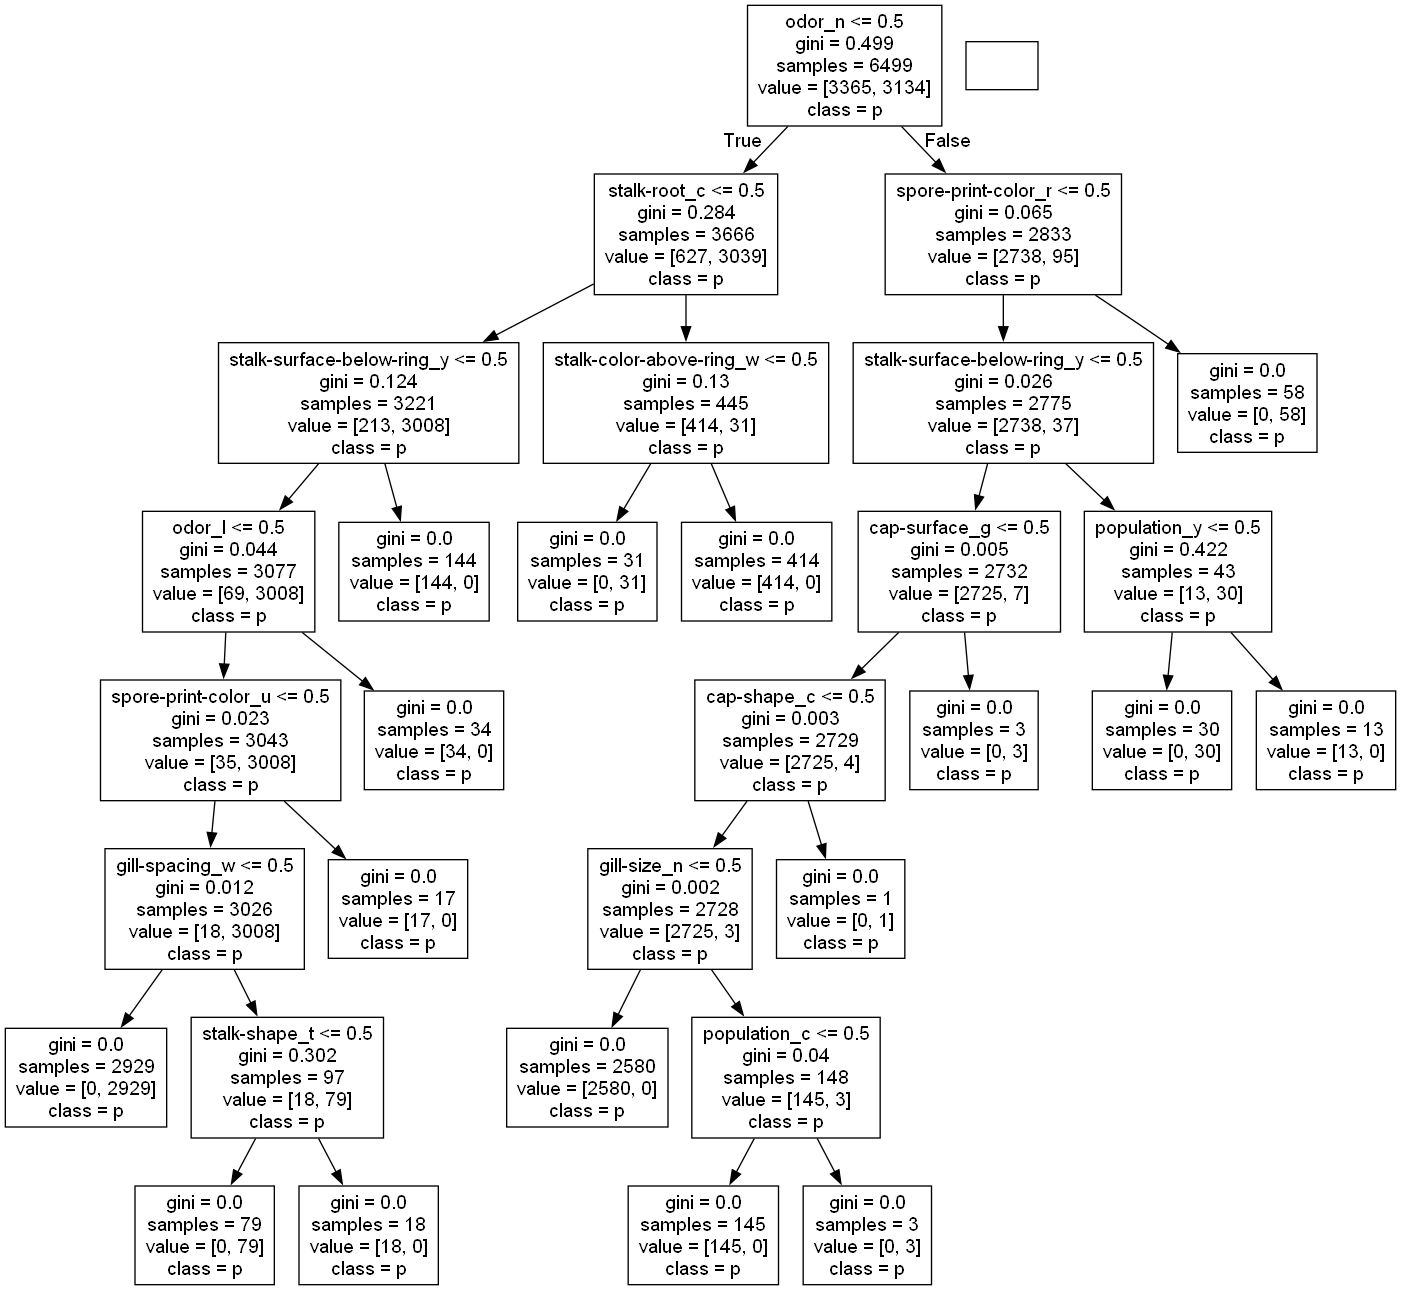

In [88]:
# Visualization of the decision tree

#%pip install pydotplus graphviz 

import os
# Add the path to the GraphViz bin directory
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

# Load libraries
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import datasets
from IPython.display import Image
from sklearn import tree

# Create DOT data
dot_data = tree.export_graphviz(decisiontree,
                                out_file=None,
                                feature_names=mushrooms_encoded_train.columns,
                                class_names= class_train)

print ('Visualization of the decision tree is\n')

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())



In [89]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

# Convert to categorical data by converting data to integers
features = mushrooms_encoded_train.astype(int)

# Select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(features, class_train)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kbest.shape[1])

# Chi squared statistic selection of top five features, 

print("The top 5 features as found by Chi Squared\n",chi2_selector.get_support(indices=True))

for i in chi2_selector.get_support(indices=True):
    print(f'The column name at index {i} is {features.columns[i]}')

Original number of features: 95
Reduced number of features: 5
The top 5 features as found by Chi Squared
 [19 22 28 45 48]
The column name at index 19 is odor_f
The column name at index 22 is odor_n
The column name at index 28 is gill-size_n
The column name at index 45 is stalk-surface-above-ring_k
The column name at index 48 is stalk-surface-below-ring_k


In [90]:
# Repeat steps 4 and 5 with the five best features selected in step 7.

mushrooms_encoded_train_chi, mushrooms_encoded_test_chi, class_train_chi, class_test_chi = train_test_split(mushrooms_encoded[['odor_f','odor_n','gill-size_n','stalk-surface-above-ring_k','stalk-surface-below-ring_k']], mushrooms_encoded['class'], test_size=0.2, random_state=42)

# Create decision tree classifier object
decisiontree_chi = DecisionTreeClassifier(random_state=0)

# Train model
model_chi = decisiontree_chi.fit(mushrooms_encoded_train_chi, class_train)

# Making the prediction
class_predict_chi = model_chi.predict(mushrooms_encoded_test_chi)


The accuracy of the decision tree model after applying chi squared statistic on test data is
 0.9735384615384616
Confusion matrix for decision tree model after applying chi squared statistic is
 [[816  27]
 [ 16 766]]


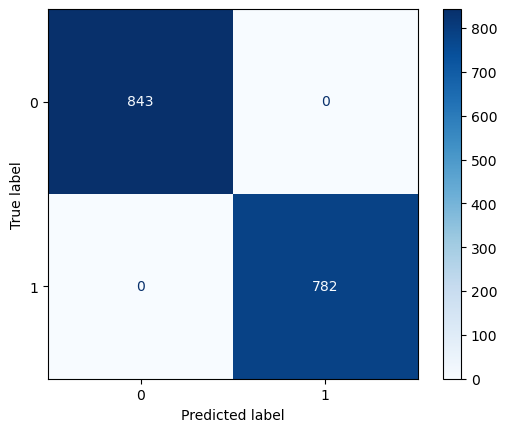

In [91]:
# Calculating the accuracy of the DecisionTreeClassifier model after applying chi squared statistic,

# Finding the accuracy on test set using score function

print ("The accuracy of the decision tree model after applying chi squared statistic on test data is\n",model_chi.score(mushrooms_encoded_test_chi,class_test_chi))


# Importing libraries for confusion matrix and its display,

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm_chi = confusion_matrix(class_test_chi,class_predict_chi)
print ("Confusion matrix for decision tree model after applying chi squared statistic is\n",cm_chi)

# Display the confusion matrix
disp_chi = ConfusionMatrixDisplay(confusion_matrix=cm_chi)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Visualization of the decision tree after applying chi squared is



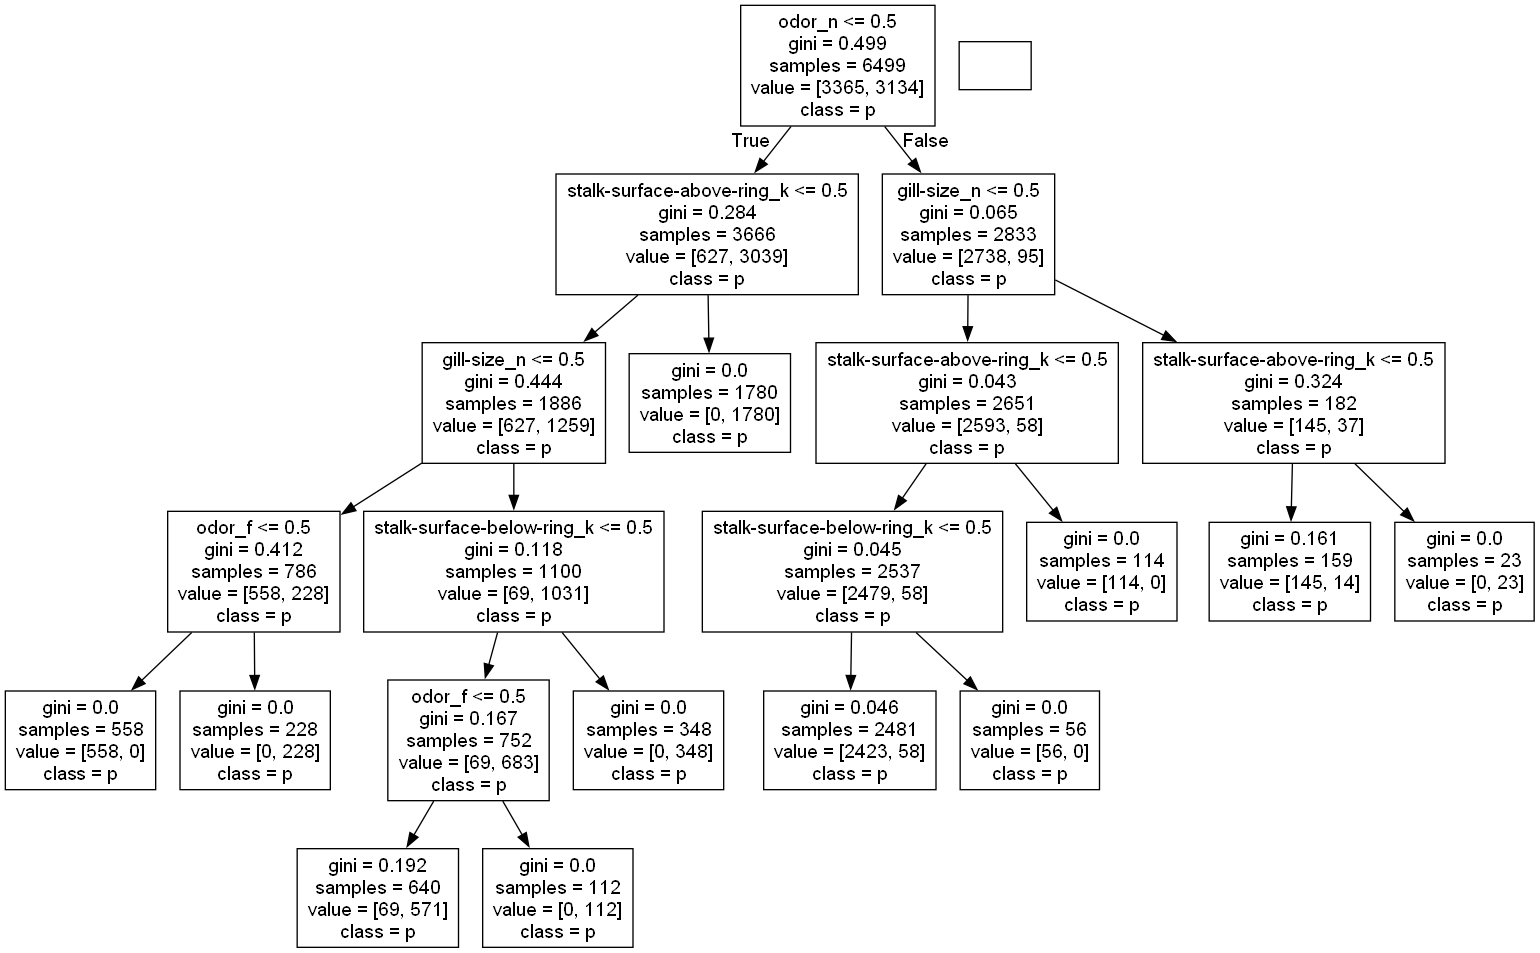

In [93]:
# Visualization of the decision tree after applying chi squared is

# Create DOT data
dot_data_chi = tree.export_graphviz(decisiontree_chi,
                                out_file=None,
                                feature_names=mushrooms_encoded_train_chi.columns,
                                class_names= class_train_chi)

print ('Visualization of the decision tree after applying chi squared is\n')

# Draw graph
graph_chi = pydotplus.graph_from_dot_data(dot_data_chi)

# Show graph
Image(graph_chi.create_png())


# Summary

We have created two decision tree models, first on the original data and the second only on 5 features which we found to contribute the most by using chi squared statistic.  This method of statistic was used, as they are categorical variables.  If it has been quantitative variables, we need to use Anova F value statistic.  

The accuracy of the decision tree model on test data is,  
 1.0  

The accuracy of the decision tree model after applying chi squared statistic on test data is,  
 0.9735384615384616  
 

The top 5 features as found by Chi Squared  
 [19 22 28 45 48]  
The column name at index 19 is odor_f  
The column name at index 22 is odor_n  
The column name at index 28 is gill-size_n  
The column name at index 45 is stalk-surface-above-ring_k  
The column name at index 48 is stalk-surface-below-ring_k  
